# 给杨胜制作的加速度计算与仿真程序
## 2024年12月6日在Github中建立，通过Binder分享


# 逐差法计算公式
$$ a=\frac{(x_6-2*x_3)}{9T^2} $$

# 另外一种计算公式(杨胜)
$$ a=\frac{(x_5-2*x_4+2*x_3-2*x_2+2*x_1-2*x_0)}{3T^2} $$

# 下面来评价一下这两个公式的优劣

# 首先假定测量存在误差，即作为随机变量的测量$X_i$满足
# $$X_i = x_i +\epsilon_i$$
# 其中$\epsilon_i$x相互独立，且服从均值为0，方差为$\sigma^2$的正态分布

# 则作为$a$的估计$\hat{a}$

# 如果用逐差法公式可得
# $$E\{\hat{a}\} = a$$
# $$Var\{\hat{a}\} = \frac{5\sigma^2}{81T^4} $$

# 如果用杨胜法公式可得
# $$E\{\hat{a}\} = a$$
# $$Var\{\hat{a}\} = \frac{(1+4+4+4+4+4)\sigma^2}{9T^4} =\frac{7\sigma^2}{3T^4} >\frac{5\sigma^2}{81T^4}$$

# 因此逐差法性能更优



<style>
hr:nth-of-type(4) {
  border-top-style: double !important;
}
</style>


# 可以算出，杨胜法的方差是逐差法的$\frac{（7/3）}{5/81)}=189/5 \approx 38$倍


In [1]:
! pip install numpy
! pip install matplotlib
# ! pip install scipy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 9.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 9.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 10.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 13.1 MB/s eta 0:00:00a 0:00:01


In [2]:
import numpy as np

def yangsheng_noNoise(x,T=0.1):
    a = (x[5]-2*x[4]+2*x[3]-2*x[2]+2*x[1]-2*x[0])/3/T**2
    return a

def zhucha_noNoise(x3 = 0.09, x6 = 0.36, T=0.1):
    a = (x6-2*x3)/9/T**2
    return a

def zhucha(x3 = 0.09, x6 = 0.36, T = 0.1, sigma = 0.001, simu_number = 100):
    x3_measure = x3 + np.random.normal(0,sigma,simu_number)
    x6_measure = x6 + np.random.normal(0,sigma,simu_number)
    a_est = np.mean((x6_measure-2*x3_measure)/9/T**2)
    return a_est

def yangsheng(x,T=0.1,sigma = 0.001,simu_number = 100):
    a_est = []
    for i in range(simu_number):
        x_measure = x + np.random.normal(0,sigma,len(x))
        a_est.append((x_measure[5]-2*x_measure[4]+2*x_measure[3]-2*x_measure[2]+2*x_measure[1]-2*x_measure[0])/3/T**2)
    return np.mean(a_est)

x = [2,6,12,20,30,42]

# print(yangsheng_noNoise(x,T=1))
# print(zhucha_noNoise(x[2],x[5],T=1))

print('杨胜法：',yangsheng(x,T=1,simu_number = 1))
print('逐差法：',zhucha(x[2],x[5],T=1,simu_number = 1))

#print(zhucha())
#print(zhucha(sigma = 0.01))
#print(zhucha(x3 = 9, x6=18))

杨胜法： 1.9986173639487752
逐差法： 1.9999983824659087


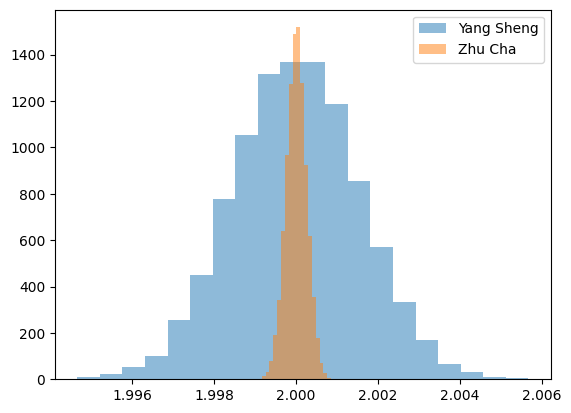

Mean of Data 1: 2.0000026765795456
Mean of Data 2: 2.0000057061078924
Var of Data 1: 2.3430529044545402e-06
Var of Data 2: 6.155195701733199e-08
Var ratio: 38.06626170788975


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl



mpl.get_cachedir()

import warnings
# 禁用所有警告
warnings.filterwarnings('ignore')

# 假设我们有两组数据
data1 = []  # 杨胜
data2 = []  # 逐差
for i in range(10000):
    data1.append(yangsheng(x,T=1,simu_number = 1))
    data2.append(zhucha(x[2],x[5],T=1,simu_number = 1))
    



# 设置默认的无衬线字体
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']  # 或者您可以选择 'Arial', 'Liberation Sans' 等
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号
# plt.rcParams['font.sans-serif'] = ['Arial']  # 'SimHei' 是一种常用的中文字体
# plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号
  

# 绘制直方图
plt.hist(data1, bins=20, alpha=0.5, label='Yang Sheng')
plt.hist(data2, bins=20, alpha=0.5, label='Zhu Cha')
plt.legend()
plt.show()

# 绘制箱线图
# plt.boxplot([data1, data2], labels=['Yang Sheng', 'Zhu Cha'])
# plt.show()

# 计算并打印均值和标准差
print(f"Mean of Data 1: {np.mean(data1)}")
print(f"Mean of Data 2: {np.mean(data2)}")
print(f"Var of Data 1: {np.var(data1)}")
print(f"Var of Data 2: {np.var(data2)}")
print(f"Var ratio: {np.var(data1)/np.var(data2)}")




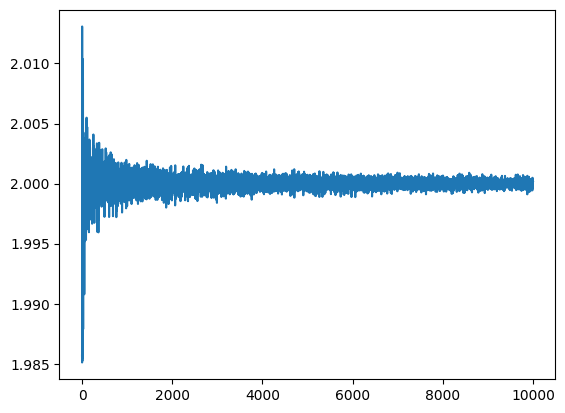

In [5]:
# 展示仿真次数对估计值的影响

import matplotlib.pyplot as plt

simu_number_max = 10000

a_est_seq = []

for i in range(simu_number_max):
    a_est_seq.append(zhucha(simu_number = i+1))
    
plt.plot(a_est_seq)


    


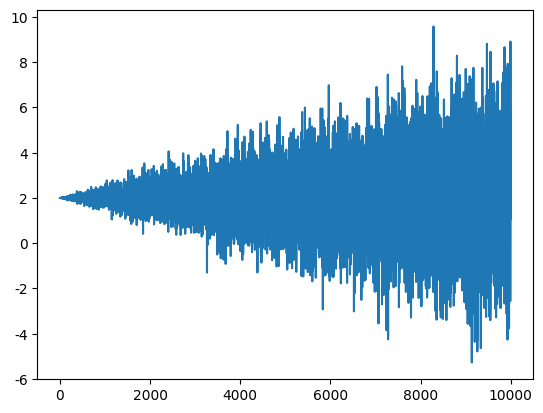

In [6]:
# 展示噪声标准差对估计的影响

import matplotlib.pyplot as plt

sigma_seq = np.linspace(0,1,10000)

a_est_seq = []

for s in sigma_seq:
    a_est_seq.append(zhucha(sigma = s))
    
plt.plot(a_est_seq)